<a href="https://colab.research.google.com/github/GauthamPrabhuM/ACMWinterSchool/blob/main/Iterative_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1

You are given the following points (xi, yi) ∈ R^2: {(0, 0), (1, 3), (2, 7), (3, −1), (4, 0), (5, 5), (6, 10)}. You want to find the best cubic polynomial that fits these points, $p(x) = c_3x^3 +c_2x^2 +c_1x+c0$. Recognize that
this can be performed using a regularized notion of least squares - this is done by treating {c0, c1, c2, c3} as decision variables in the following optimization problem for appropriate values of the matrix A. 


$\underset{c_0, c_1, c_2, c_3}{\operatorname{min}} ||Ac − y||^2 + λ||c||^2 $


where λ is a fixed parameter. 

(a) Write down the matrix A. \\
(b) Derive the value of the optimal solution using necessary and sufficient conditions. \\
(c) Solve the problem using gradient descent with exact line search and report the values of c obtained \\
for different values of λ say, λ = 0, 1, 10 and 1000. How many iterations did it take to converge in each case? \\
(d) Solve the problem using Newton’s method. Use λ = 0, 1, 10 and 1000. How many iterations did it take for each? \\
(e) How do the values of the optimal c compare across different settings of λ?
(f) Plot the polynomial p(x) obtained for different values of λ. Also plot the given points (xi, yi) in the same plot. So you will have one plot with four lines one for each λ ∈ {0, 1, 10, 1000}. What conclusions can you make here on the four polynomials? \\

## Solution

### **Import required libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### **Define A ,Y and I**

In [ ]:
points = [ [0,0], [1,3], [2,7], [3,-1], [4,0], [5,5], [6,10] ]
C = np.random.randint(-100,100,4).reshape(-1)
A = [ [points[i][0]**j for j in range(len(C))] for i in range(len(points))]
A = np.array(A)

Y = np.array( [points[i][1] for i in range(len(points)) ]).reshape(len(points),1)

I = np.eye(A.shape[1],A.shape[1]) # Identity matrix 

In [ ]:
print("\nInitial Guess [c0, c1, c2, c3] : ",C)
print("\nMatrix A :",A.shape,"\n",A)
print("\nY :",Y.reshape(-1))



Initial Guess [c0, c1, c2, c3] :  [-57   9  43 -37]

Matrix A : (7, 4) 
 [[  1   0   0   0]
 [  1   1   1   1]
 [  1   2   4   8]
 [  1   3   9  27]
 [  1   4  16  64]
 [  1   5  25 125]
 [  1   6  36 216]]

Y : [ 0  3  7 -1  0  5 10]


### **Define Function f, Gradient $∇(f)$, Hessian $∇^2(f)$ and True Solution**

In [ ]:
def function_f(X,λ):
    return np.linalg.norm(A@X - Y)**2 + λ*np.linalg.norm(X)**2

def gradient_f(X,λ):
    return 2*(A.T)@A@X - 2*(A.T)@Y + 2*λ*X

def hessian_f(λ):  # Note that for given function hessian is independent of X 
    return 2*(A.T)@A + 2*λ*I

def exact_line_search(dk,λ):
    alpha_k = (dk.T)@dk/( dk.T@hessian_f(λ)@dk )  # closed form solution 
    return alpha_k[0][0]

def true_solution(λ):
    return np.linalg.inv(A.T@A + λ*I)@A.T@Y


### **Gradient Descent Algorithm with exact line search Implementation**

In [ ]:
def gradient_descent(λ,method='steepest_descent'):
    
    # init step :  fix intial guess point X = (c0,c1,c2,c3) in R^4 
    X = np.array([[3],[3],[3],[3]]) 
    k = 0 # iteration counter
    epsilon = 10**(-5)  # error bound
    
    # Gradient Descent Algorithm Begins
    
    if method == 'steepest_descent' : 
        dk = -gradient_f(X,λ)
    elif method == 'newton':
        hessian_inv = np.linalg.inv(hessian_f(λ))
        dk = -hessian_inv@gradient_f(X,λ)

    while np.linalg.norm(dk) > epsilon :  # stopping criterion 
        if method == 'steepest_descent' :
            alpha_k = exact_line_search(dk,λ)
        if method == 'newton' : 
            alpha_k = 1
        X_new = X + alpha_k*dk
        X = X_new
        
        k = k + 1
        
        # update gradient dk
        if method == 'steepest_descent' : 
            dk = -gradient_f(X,λ)

            # gradient descent with momentum rule
            # momentum = 0.5
            # dk = momentum*dk + (1-momentum)*(-gradient_f(X,λ))
        elif method == 'newton' : 
            dk = -hessian_inv@gradient_f(X,λ)
            
    # Gradient Descent Algorithm Ends
    
    return X.reshape(-1),k
    

In [ ]:
def print_summary(method='steepest_descent') :
    print("="*106 + "\n" + "\t"*6+" Gradient Descent Algorithm Summary \n" + "="*106)
    print("No of iterations" + "\t"+"::"+"\t"+"C0"+"\t"+"::"+"\t"+"C1"+"\t"+"::"+"\t"+"C2"+"\t"+"::"+"\t"+"C3"+"\t"+"::"+"\t"+"λ"+"\t"+"::")
    print("="*106)
    solutions = []
    for λ in [0,1,10,100,1000] : 
        C, iterations = gradient_descent(λ,method=method)
        solutions.append(C)
        print("{:>26}".format("%d   ||"%(iterations))+"{:>16}".format("%0.3f    ||"%C[0])+"{:>16}".format("%0.3f    ||"%C[1])+"{:>16}".format("%0.3f    ||"%C[2])+"{:>16}".format("%0.3f    ||"%C[3])+"{:>16}".format("%d    ||"%λ ))
    print("="*106)
    return solutions

**(c) - Answer**

**Steepest gradient descent with exact line search** 

In [ ]:
method = "steepest_descent"
GD_solutions = print_summary(method)

						 Gradient Descent Algorithm Summary 
No of iterations	::	C0	::	C1	::	C2	::	C3	::	λ	::
                 5525   ||     0.000    ||     6.940    ||    -3.357    ||     0.417    ||         0    ||
                 1471   ||     1.347    ||     2.142    ||    -1.318    ||     0.200    ||         1    ||
                  713   ||     0.454    ||     0.368    ||    -0.287    ||     0.079    ||        10    ||
                  347   ||     0.055    ||     0.038    ||    -0.035    ||     0.046    ||       100    ||
                   17   ||     0.006    ||     0.005    ||     0.002    ||     0.041    ||      1000    ||


**(d) - Answer**  

**Newton method with constant step size $\alpha$ = 1** 

In [ ]:
method = "newton"
newton_solutions = print_summary(method)

						 Gradient Descent Algorithm Summary 
No of iterations	::	C0	::	C1	::	C2	::	C3	::	λ	::
                    1   ||     0.000    ||     6.940    ||    -3.357    ||     0.417    ||         0    ||
                    1   ||     1.347    ||     2.142    ||    -1.318    ||     0.200    ||         1    ||
                    1   ||     0.454    ||     0.368    ||    -0.287    ||     0.079    ||        10    ||
                    1   ||     0.055    ||     0.038    ||    -0.035    ||     0.046    ||       100    ||
                    1   ||     0.006    ||     0.005    ||     0.002    ||     0.041    ||      1000    ||


**(e) - Answer**

**As $\lambda$ increases in general C0, C1, C2, and C3 decreases or they change in way s.t. ||(C0,C1,C2,C3)|| decreases**.

In [ ]:
# Since solutions obtained from both newton method and steepest descent are same , so it doesn't matter which 
# solution we use to plot polynomials p(x) = c0 + c1*x + c2*x^2 + c3*x^3

**(f) - Answer**

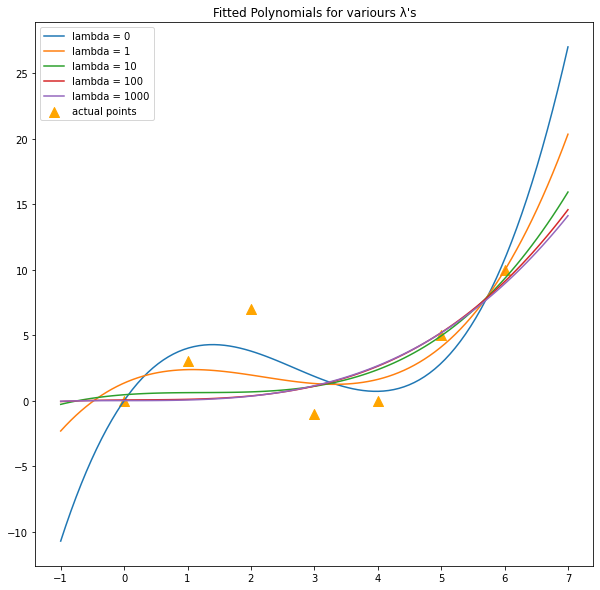

In [ ]:
def plot_polynomials(C_matrix) :
    global Y
    X = np.linspace(-1,7,100)
    Lambda = [0,1,10,100,1000]
    plt.figure(figsize=(10,10))
    plt.title("Fitted Polynomials for variours λ's")
    for i in range(len(Lambda)): 
        C = C_matrix[i]
        P_X = C[0] + C[1]*X + C[2]*X**2 + C[3]*X**3
        plt.plot(X,P_X,label='lambda = %d'%Lambda[i])
    
    # Plot given points (xi,yi) in questions 
    X = A[:,1]
    Y = Y 
    plt.scatter(X,Y,marker='^',s=100,label='actual points',c='orange')
    plt.legend()
    plt.show()
C_matrix = GD_solutions 
plot_polynomials(C_matrix)

**Note : As lambda increases ,Polynomials start flattening and approaching zero**

**Reason**

Idea is simple. as our optimization function f(x) contains a term $\lambda c^Tc$ , with increase in $\lambda$ our algorithm will penalize ||c|| of coefficients i.e. in general all coefficients will start approaching 0 with increase in $\lambda$

Now this has a very intereseting application.

Notice in above plot for λ=0 , there was no penalty on coefficients so curve is kind of flexible (and likely to overfit ) and try to adjust with respect to given points. But with increase in λ curve become less biased toward points seems like it fits given point more nicely. 

But Caution!! don't increase λ (say λ=100000) much because then curve will almost flatten and start flattening or becoming zero which is of no use at all. 




## 2. HomeWork Exercise 


### Dataset for problem is present in classroom by name "dataset.txt"

Suppose there are n observations (xi, yi) where the feature vector xi ∈ $R^m$ and the label yi ∈ {−1, 1}.

Logistic regression models observations using a co-efficient vector w ∈ $R^m$, in the following manner,

$$ y_i =  \left\{
\begin{array}{ll}
       1  & \text{with probability  σ(w>xi)} \\
       0  & \text{with probability  1 - σ(w>xi)} \\
\end{array} 
\right. $$ 


where σ(a) = $\frac{1}{1+e^{−a}}$ . The conditional probability of assigning a label yi to the instance xi given the value  of w is P(yi|w, xi) = $σ(y_iw^Tx_i)$. The overall negative log likelihood of the given data collection is

$$
l(w) = -\sum_{i=1}^n log(σ(y_iw^Tx_i))
$$


You need to find w that minimizes l(w). (In general the w could also contain an intercept term, so that w = [w0, w1, . . . , wm] ∈ $R^{m+1}$ and every data point x is augmented with an additional component  x0 = 1). A two dimensional dataset containing 2000 sample points is given. Each row corresponds to a sample
where the first two entries in a row give the features (x1, x2) and the last entry gives the class label. Randomly split this dataset into a training set containing n = 1400 points and a test set containing the remaining 600 points.


(a) Is l(w) a convex function over w ∈ $R^m$ ? Prove or disprove.\\

(b) Write the expression for the gradient ∇l(w) and Hessian $∇^2$
l(w). \\

(c) Apply steepest descent to compute the best value of w that minimizes l(w) over the training set. How many iterations did it take? Report the step size and stopping criteria you used. \\

(d) Plot how l(w) changes in each iteration: X-axis should show iterations and Y axis should show l(w). \\

(e)Provide a scatter plot of the training set. Show points having true class +1 and points in true class -1 with different colours/shapes. In this plot show the final decision boundary learnt $w_*^Tx$ = 0 and also the initial decision boundary $w_0^Tx$ = 0 using the starting point w0.
Label the plots appropriately. \\

(f) With the learnt $w*$, perform a prediction on the test set and compute the mis-classification error \\

(g) Try five different starting points and run steepest descent. Report the starting points you used. Do
you reach the same optimal point? Is the final value of the function l(.) same always? \\

(h) Try various settings of step size and stopping criteria learnt in class. Which step size and stopping
criteria would you recommend? \\

**Matrices and Vectors** <br>
X --> input_features $\in R^{m}$ <br>
Y --> true_labels $ \in R^{n}$ <br>
W --> weights $ \in R^{m+1}$ <br>
A --> augmented input_feature [1, X]  $ \in R^{{n}X{(m+1)}}$ <br>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from time import time
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv("dataset.txt",sep=" ",names=["x1","x2","label"])
ones = np.ones(len(data))
data['x0'] = ones
data.head()
X = data.iloc[:,:2].values.reshape(-1,2)
Y = data.iloc[:,2].values.reshape(-1,1)
A = data.loc[:,['x0','x1','x2']].values.reshape(-1,3)
W0 = np.array( [ [1],[-1],[1] ])

A_train, A_test, Y_train, Y_test = train_test_split(A,Y,test_size=0.3,random_state=10)
X_train, X_test = A_train[:,[1,2]],A_test[:,[1,2]]
A_train.shape, A_test.shape,Y_train.shape, Y_test.shape, X_train.shape, X_test.shape

((1400, 3), (600, 3), (1400, 1), (600, 1), (1400, 2), (600, 2))

In [ ]:
def logistic_f(a):
    return 1/(1+np.exp(-a))

def affine_map(W):  
    return np.multiply(Y_train, A_train@W)

def log_likelihood(W):  # l(w) 
    affine_res = affine_map(W)
    logistic_res = logistic_f(affine_res)
    likelihood_val = -np.sum(np.log(logistic_res))
    return likelihood_val

def gradient_lw(W):
    B = logistic_f( affine_map(W) )
    grad = -A_train.T@(np.multiply(Y_train,1-B))
    return grad.reshape(-1,1)

def hessian_lw(W):
    B = logistic_f( affine_map(W) )
    hessian = A_train.T@( np.multiply(A_train, np.multiply( B, 1-B)))
    return hessian


**(c) - Answer**

In [ ]:
def gradient_descent(W_init,method='steepest_descent'):
    
    # init step :  fix intial guess point W = (w0,w1,w2) in R^3 
    W = W_init
    
    #cost_function_values
    J = [1000]
    J.append(log_likelihood(W))
    
    k = 0 # iteration counter
    epsilon = 0.05  # error bound
    alpha = 0.1  # constant alpha (step size)
    # Gradient Descent Algorithm Begins
    if method=='steepest_descent' : 
        dk = -gradient_lw(W)
    elif method == 'newton' : 
        dk = -np.linalg.inv( hessian_lw(W) )@gradient_lw(W)
    W_new = W + alpha*dk
    
    while ( abs(J[-1]) > epsilon ):  
        W_new = W + alpha*dk
        W = W_new
        
        k = k + 1
        
        # update gradient dk
        if method=='steepest_descent' : 
            dk = -gradient_lw(W)
        elif method == 'newton' : 
            dk = -np.linalg.inv( hessian_lw(W) )@gradient_lw(W)
        
        # add current cost 
        J.append( log_likelihood(W))
        
    # Gradient Descent Algorithm Ends
    print("Minimum log-likelihood l(w) obtained : ", J[-1])
    return J,  W.reshape(-1),k

W_init = W0
J, W_opt, iterations = gradient_descent(W_init)
print("Optimal Weights W* :", W_opt)
print("Total no of iterations : ",iterations)

Minimum log-likelihood l(w) obtained :  0.049590357337909355
Optimal Weights W* : [ -6.23064226  45.19213398 122.47869129]
Total no of iterations :  216


**(d) - Answer**

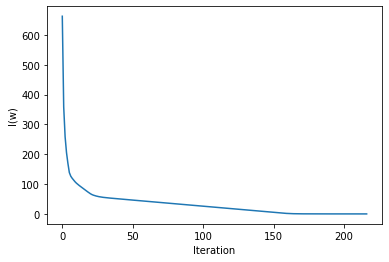

In [ ]:
def plot_cost_function(J):
    n = len(J)
    plt.plot(range(n),J)
    plt.xlabel("Iteration")
    plt.ylabel("l(w)")
    plt.show()
plot_cost_function(J[1:])

**(e) - Answer**

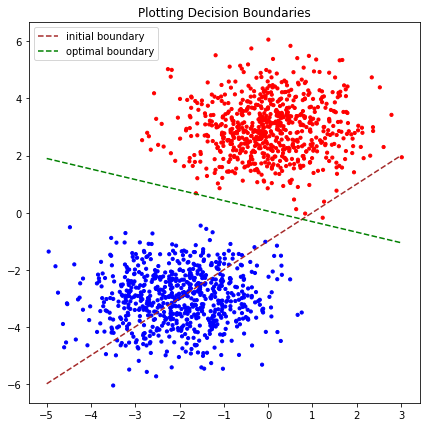

In [ ]:
def plot_decision_boundary(X_, Y_, W_init,W_opt):
    N = len(X_)
    plt.figure(figsize=(7,7))
    plt.title("Plotting Decision Boundaries")
    colors = ['red' if Y_[i]==1 else 'blue' for i in range(N)] # Assign color to each point based on its corresponding cluster 
    # Plot dataset
    plt.scatter(X_[:,0],X_[:,1], c = colors, s= 10)
    
    #draw decision boundary 
    x1_unif = np.linspace(-5,3,100)
    x2_init_bdry = [ -(W_init[0] + W_init[1]*x1)/W_init[2] for x1 in x1_unif]
    plt.plot(x1_unif,x2_init_bdry,linestyle='dashed',color='brown',label='initial boundary')
    
    x2_opt_bdry = [ -(W_opt[0] + W_opt[1]*x1)/W_opt[2] for x1 in x1_unif]
    plt.plot(x1_unif,x2_opt_bdry,linestyle='dashed',color='green',label='optimal boundary')
    
    plt.legend()
    plt.show()
    
plot_decision_boundary(X_train,Y_train,W_init,W_opt)

**(f) - Answer**

Misclassification Error :  0.0


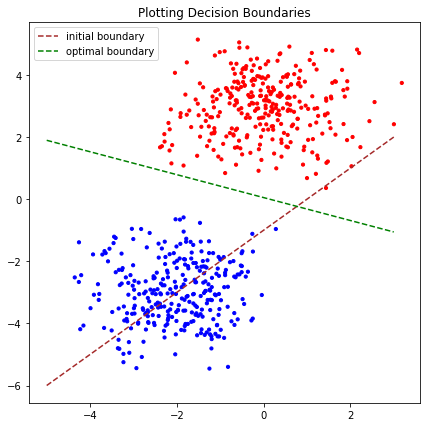

In [ ]:
# Prediction on test dataset

A_test = A_test.reshape(-1,3,1)
N_test = len(A_test)
Y_pred = [ 1 if W_opt@x_test >= 0 else -1  for x_test in A_test]
Misclassfication_error = (1/N_test)*np.sum( [Y_pred[i] != Y_test[i] for i in range(N_test)] )

print( "Misclassification Error : ", Misclassfication_error)
  
plot_decision_boundary(X_test,Y_test,W_init,W_opt)

**(g) - Answer**

In [ ]:
# Generate 5 random different point in space 
five_points = np.random.randint(-100,100,size=(5,2))
ones = np.ones((5,1))
five_points = np.append(ones,five_points,axis=1).reshape(5,3,1)
for point in five_points : 
    J, W_opt, iterations = gradient_descent(point)
    print("Starting Point W0 : ", point.reshape(-1))
    print("Optimal Weights W :", W_opt)
    print("Total no of iterations : ",iterations)
    print()

Minimum log-likelihood l(w) obtained :  1.4654943925052174e-14
Starting Point W0 :  [  1. -72. -20.]
Optimal Weights W : [-13.56662081  89.50485108 360.23561727]
Total no of iterations :  1

Minimum log-likelihood l(w) obtained :  5.3290705182007656e-15
Starting Point W0 :  [  1. -15. -61.]
Optimal Weights W : [  0.59984211 128.07550859 356.19862727]
Total no of iterations :  1

Minimum log-likelihood l(w) obtained :  0.04975933780113573
Starting Point W0 :  [ 1. 56. 77.]
Optimal Weights W : [10.99942641 39.6919691  83.77215583]
Total no of iterations :  146

Minimum log-likelihood l(w) obtained :  1.3211653993040236e-13
Starting Point W0 :  [  1. -23. -85.]
Optimal Weights W : [  0.59999938 120.07569925 332.19860011]
Total no of iterations :  1

Minimum log-likelihood l(w) obtained :  -0.0
Starting Point W0 :  [  1.  72. -37.]
Optimal Weights W : [ 40.86688072  88.48693564 238.57952749]
Total no of iterations :  1



Note that for  different starting points we are getting different optimal point **W_opt**  and all took different no of iterations but for each choice l(w) utlimately converge to 0 always because this was set to be atmost epsilon = $10^{-3}$ in stopping criterion of steepest gradient descent.

**(h) - Answer**

In [ ]:
# Try different different stopping criterion and step sizes 

def stopping_criterions(i=0,epsilon=10**(-3), x_new = 0, x_old=0 , dk=None,func = None):
    
    # Norm of gradient 
    if i == 0 : 
        return (np.linalg.norm(dk) > epsilon)
    
    # || f(x_new) - f(x_old)|| 
    if i == 1 : 
        return np.linalg.norm(func(x_new) - func(x_old)) > epsilon
    
    # || x_new - x_old || 
    if i == 2 : 
        return np.linalg.norm(x_new - x_old) > epsilon
    
    # ( || f(x_new) - f(x_old)||) / ( max( 1, || f(x_old)|| ) )
    if i == 3 : 
        return np.linalg.norm(func(x_new) - func(x_old))/max(1, np.linalg.norm(func(x_old))) > epsilon
    
    # || x_new - x_old ||  / max( 1, ||x_old|| )
    if i == 4 : 
        return np.linalg.norm(x_new - x_old) > epsilon


def step_sizes(i=0,W=None,dk=None, iteration = 1):
    
    # Exact Line Search 
    if i==0 : 
        # Using 1-dim optimization method -- Bisection method (assuming step is some small number between [0.1,5] )
        a,b = 0,5
        for k in range(0,10) : 
            xk = (a + b)/2 
            grad = gradient_lw(W + xk*dk)
            grad_norm = round( np.linalg.norm(grad),3)
            if   ( grad_norm == 0.) :
                return xk
            elif ( grad_norm > 0. ) :
                b=xk
            else :
                a = xk
        return xk
    
    # Constant Step Size 
    if i == 1 : 
        return 0.1
    
    # diminishing step size 
    if i == 2 : 
        return 1/iteration

In [ ]:
def gradient_descent_criterions(W_init,sc_index=0,step_index=0):
    
    start = time()
    
    # init step :  fix intial guess point W = (w0,w1,w2) in R^3 
    W = W_init
            
    k = 0 # iteration counter
    epsilon = 1  # error bound
    epsilon2 = 10**(-3)
    alpha_0 = 0.001
    # Gradient Descent Algorithm Begins
    
    dk = -gradient_lw(W)    
    W_new = W + alpha_0*dk

    while stopping_criterions(i=sc_index,epsilon=epsilon, x_new = W_new, x_old=W , dk=dk,func = log_likelihood) :
#         print(W_new.reshape(-1))
        alpha_k = step_sizes(i=step_index,W=W_new,dk=dk, iteration = k+1)
        if alpha_k < 0.000001 : 
            break
        W_new = W + alpha_k*dk
        W = W_new
        
        k = k + 1
        
        # update gradient dk
        dk = -gradient_lw(W)

    end = time()
    
    # Gradient Descent Algorithm Ends
    return W.reshape(-1),k, end - start


In [ ]:
# This code will help plot figure in center of output cell 
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

-----------------------------------------------------------------------------------------------------------------------------

           Stopping Criterion :  Norm of gradient             Step Size Method -  Exact Line Search 

Weights : [0.24634895 2.48709072 6.40419346] Total no of iterations :  134 Time taken (in seconds) :  0.10427594184875488
-----------------------------------------------------------------------------------------------------------------------------


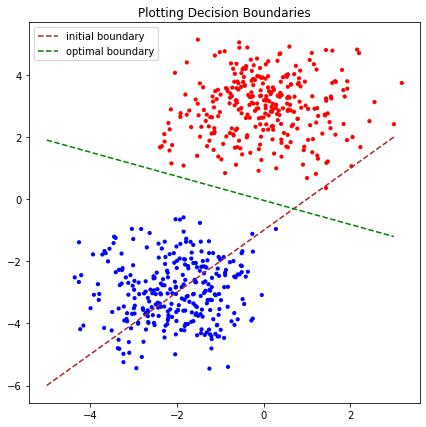

-----------------------------------------------------------------------------------------------------------------------------

           Stopping Criterion :  Norm of gradient       Step Size Method - Constant Step Size = 0.1 

Weights : [ -6.93448685  46.34010449 122.00218851] Total no of iterations :  165 Time taken (in seconds) :  0.020615100860595703
-----------------------------------------------------------------------------------------------------------------------------


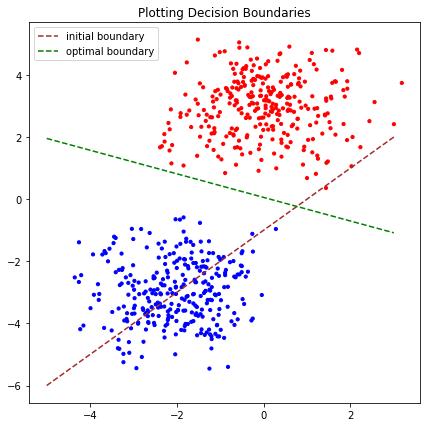

-----------------------------------------------------------------------------------------------------------------------------

           Stopping Criterion :  Norm of gradient Step Size Method - Diminishing Step Size = 1/iteration_count

Weights : [-244.25988473  735.34168861 1095.03507621] Total no of iterations :  1000000 Time taken (in seconds) :  66.74000453948975
-----------------------------------------------------------------------------------------------------------------------------


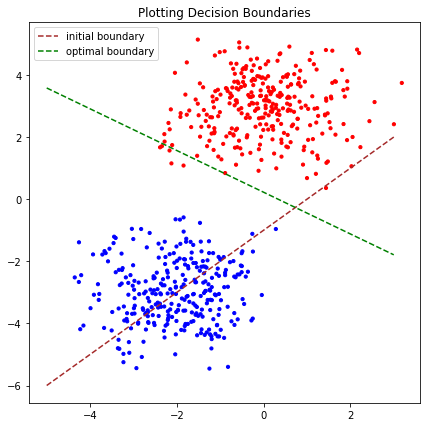

-----------------------------------------------------------------------------------------------------------------------------

    Stopping Criterion : || f(x_new) - f(x_old)||             Step Size Method -  Exact Line Search 

Weights : [-0.57016655  3.1995237   5.87824537] Total no of iterations :  1 Time taken (in seconds) :  0.00559544563293457
-----------------------------------------------------------------------------------------------------------------------------


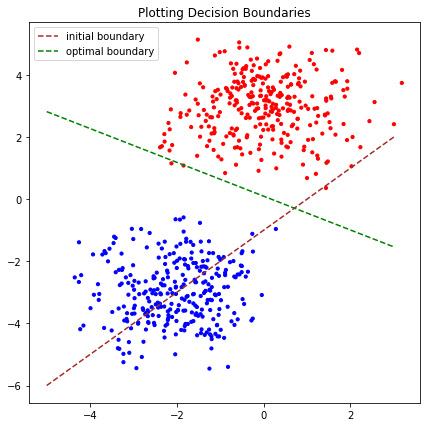

-----------------------------------------------------------------------------------------------------------------------------

    Stopping Criterion : || f(x_new) - f(x_old)||       Step Size Method - Constant Step Size = 0.1 

Weights : [-31.15701092  85.00624543 100.90646522] Total no of iterations :  1 Time taken (in seconds) :  0.0011229515075683594
-----------------------------------------------------------------------------------------------------------------------------


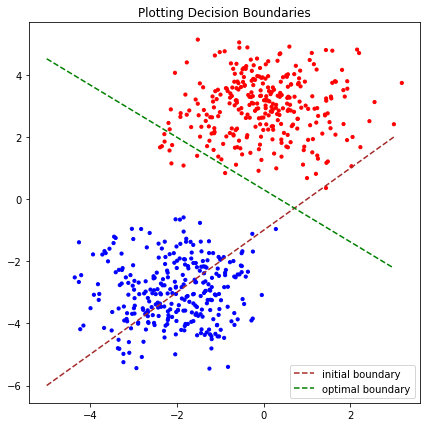

-----------------------------------------------------------------------------------------------------------------------------

    Stopping Criterion : || f(x_new) - f(x_old)|| Step Size Method - Diminishing Step Size = 1/iteration_count

Weights : [-320.57010915  859.06245433 1000.06465224] Total no of iterations :  1 Time taken (in seconds) :  0.0046536922454833984
-----------------------------------------------------------------------------------------------------------------------------


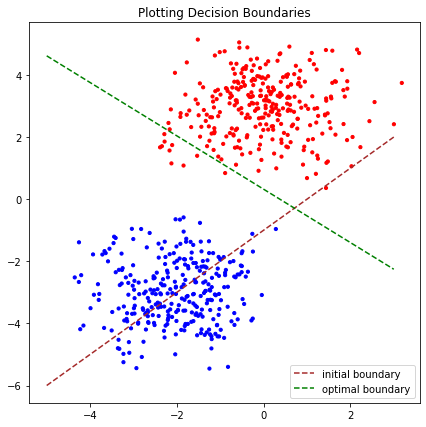

-----------------------------------------------------------------------------------------------------------------------------

         Stopping Criterion : || x_new - x_old ||             Step Size Method -  Exact Line Search 

Weights : [-0.57016655  3.1995237   5.87824537] Total no of iterations :  1 Time taken (in seconds) :  0.0016486644744873047
-----------------------------------------------------------------------------------------------------------------------------


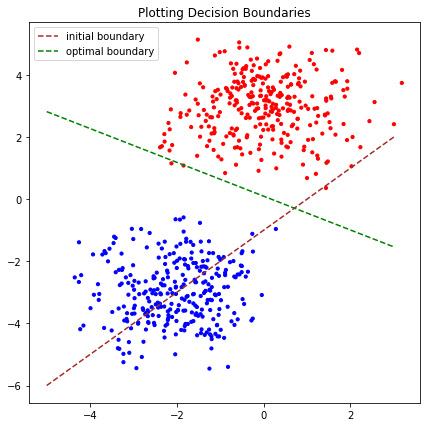

-----------------------------------------------------------------------------------------------------------------------------

         Stopping Criterion : || x_new - x_old ||       Step Size Method - Constant Step Size = 0.1 

Weights : [-31.15701092  85.00624543 100.90646522] Total no of iterations :  1 Time taken (in seconds) :  0.0004928112030029297
-----------------------------------------------------------------------------------------------------------------------------


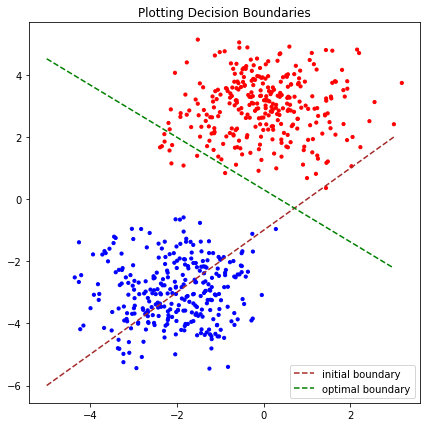

-----------------------------------------------------------------------------------------------------------------------------

         Stopping Criterion : || x_new - x_old || Step Size Method - Diminishing Step Size = 1/iteration_count

Weights : [-320.57010915  859.06245433 1000.06465224] Total no of iterations :  1 Time taken (in seconds) :  0.001033782958984375
-----------------------------------------------------------------------------------------------------------------------------


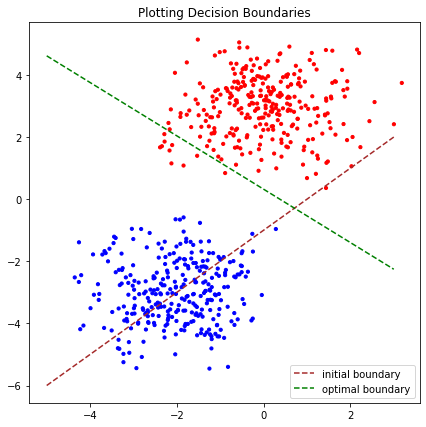

-----------------------------------------------------------------------------------------------------------------------------

Stopping Criterion :  ( || f(x_new) - f(x_old)||) / ( max( 1, || f(x_old)|| ) )             Step Size Method -  Exact Line Search 

Weights : [ 1 -1  1] Total no of iterations :  0 Time taken (in seconds) :  0.0008766651153564453
-----------------------------------------------------------------------------------------------------------------------------


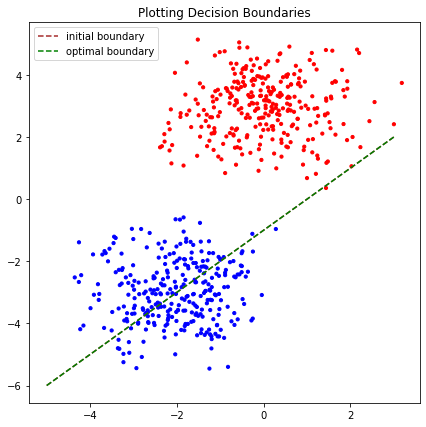

-----------------------------------------------------------------------------------------------------------------------------

Stopping Criterion :  ( || f(x_new) - f(x_old)||) / ( max( 1, || f(x_old)|| ) )       Step Size Method - Constant Step Size = 0.1 

Weights : [ 1 -1  1] Total no of iterations :  0 Time taken (in seconds) :  0.0008158683776855469
-----------------------------------------------------------------------------------------------------------------------------


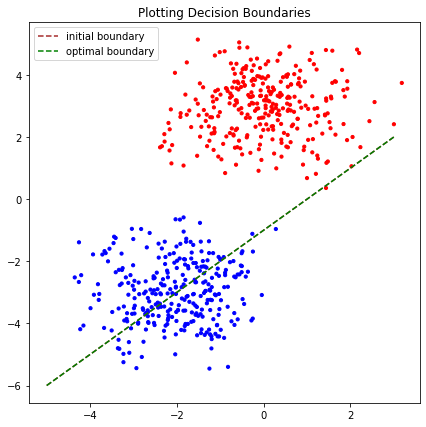

-----------------------------------------------------------------------------------------------------------------------------

Stopping Criterion :  ( || f(x_new) - f(x_old)||) / ( max( 1, || f(x_old)|| ) ) Step Size Method - Diminishing Step Size = 1/iteration_count

Weights : [ 1 -1  1] Total no of iterations :  0 Time taken (in seconds) :  0.0032935142517089844
-----------------------------------------------------------------------------------------------------------------------------


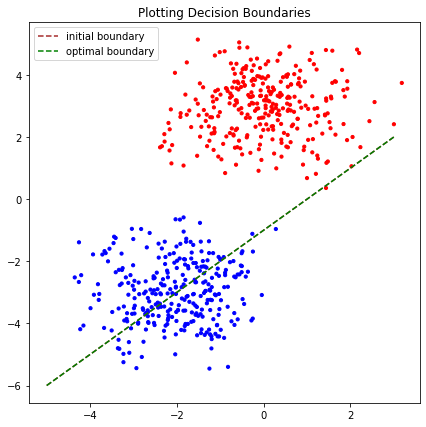

-----------------------------------------------------------------------------------------------------------------------------

Stopping Criterion :  || x_new - x_old ||  / max( 1, ||x_old|| )             Step Size Method -  Exact Line Search 

Weights : [-0.57016655  3.1995237   5.87824537] Total no of iterations :  1 Time taken (in seconds) :  0.0017092227935791016
-----------------------------------------------------------------------------------------------------------------------------


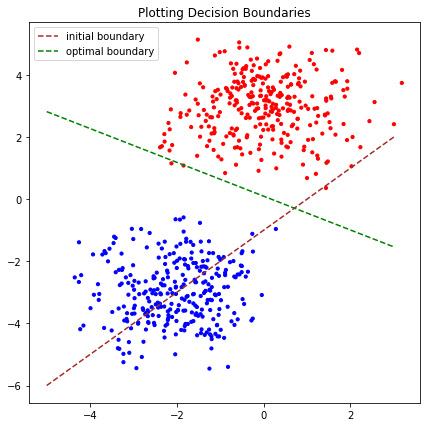

-----------------------------------------------------------------------------------------------------------------------------

Stopping Criterion :  || x_new - x_old ||  / max( 1, ||x_old|| )       Step Size Method - Constant Step Size = 0.1 

Weights : [-31.15701092  85.00624543 100.90646522] Total no of iterations :  1 Time taken (in seconds) :  0.0006837844848632812
-----------------------------------------------------------------------------------------------------------------------------


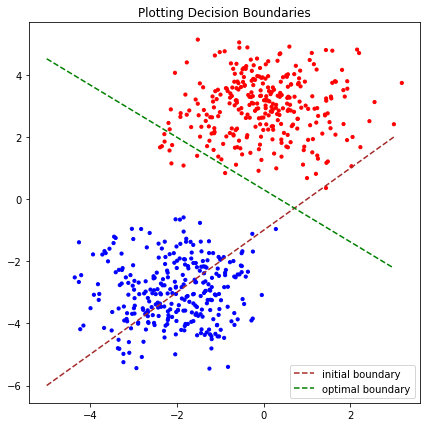

-----------------------------------------------------------------------------------------------------------------------------

Stopping Criterion :  || x_new - x_old ||  / max( 1, ||x_old|| ) Step Size Method - Diminishing Step Size = 1/iteration_count

Weights : [-320.57010915  859.06245433 1000.06465224] Total no of iterations :  1 Time taken (in seconds) :  0.0009298324584960938
-----------------------------------------------------------------------------------------------------------------------------


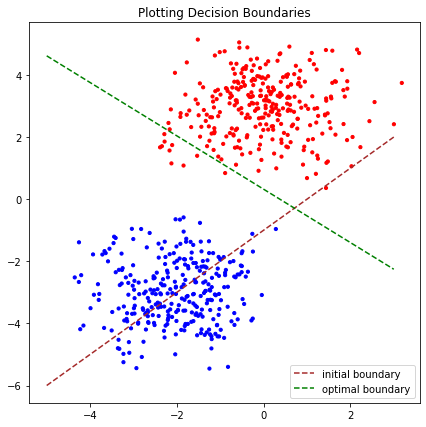

In [ ]:

W_init = np.array( [ [1],[-1],[1] ])
step_labels = [ " Exact Line Search ", "Constant Step Size = 0.1 ", "Diminishing Step Size = 1/iteration_count"  ]
sc_labels = [ " Norm of gradient ", "|| f(x_new) - f(x_old)|| ", "|| x_new - x_old || ", 
             " ( || f(x_new) - f(x_old)||) / ( max( 1, || f(x_old)|| ) ) " ,
             " || x_new - x_old ||  / max( 1, ||x_old|| ) "
            ]
for sc_index in range(5): 
    for step_index in range(3) : 
        print("-"*125)
        print("\n"+"{:>50}".format("Stopping Criterion : "+sc_labels[sc_index]) + "{:>50}".format("Step Size Method - " + step_labels[step_index])+"\n")
        W_opt, iterations, time_taken = gradient_descent_criterions(W_init,sc_index,step_index)
        print("Weights :", W_opt, "Total no of iterations : ",iterations, "Time taken (in seconds) : ", time_taken )
        
        print("-"*125)
        
        # Plot decision boundary on test data to see misclassification error 
        plot_decision_boundary(X_test,Y_test,W_init,W_opt)


**Conclusion**

1. Stopping criterions which uses ||f(X_new) - f(X_old)|| are performing worst so I won't recommend that 

2. Stopping criterion which generally uses ||X_new - X_old|| are not really trustworty as it might seem like they converge in single step  but are very likely to converge to those X's s.t. ||X_new||, is itself very small and those points might not be optimal solution. here in this case it is working fine with some misclassification as can be seen in above plots.

3. The stopping criterion which uses $∇f$ at each **Wk** obtained in each iteration is most trustworthy according to me because at least they will help us reach local minima . so I always go with stopping criterion which uses $∇(f)$

4. For Step size I find constant step size work quite nicely ( it uses fewer iterations in compared to other methods like Exact Line search etc.  to converge  ) so here I am using constant step size of 0.1
